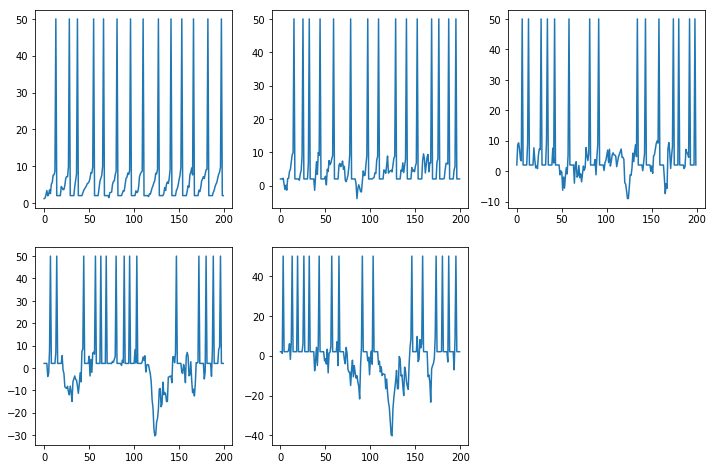

In [19]:
from __future__ import print_function
"""
Created on Wed Apr 22 16:02:53 2015

Basic integrate-and-fire neuron 
R Rao 2007

translated to Python by rkp 2015
"""

import numpy as np
import matplotlib.pyplot as plt


# input current
I = 1 # nA

# capacitance and leak resistance
C = 1 # nF
R = 40 # M ohms

# I & F implementation dV/dt = - V/RC + I/C
# Using h = 1 ms step size, Euler method

V = 0
tstop = 200
abs_ref = 5 # absolute refractory period 
ref = 0 # absolute refractory period counter
V_trace = []  # voltage trace for plotting
V_th = 10 # spike threshold
spiketimes = [] # list of spike times

plt.figure(figsize=(12,8))

for noiseamp in range(1,6): # amplitude of added noise

    # input current
    I += noiseamp*np.random.normal(0, 1, (tstop,)) # nA; Gaussian noise

    for t in range(tstop):

       if not ref:
           V = V - (V/(R*C)) + (I[t]/C)
       else:
           ref -= 1
           V = 0.2 * V_th # reset voltage

       if V > V_th:
           V = 50 # emit spike
           ref = abs_ref # set refractory counter

       V_trace += [V]
    
    subplotnum = '23' + str(noiseamp)
    plt.subplot(int(subplotnum))
    plt.plot(V_trace)
    V_trace = []

plt.show()